In [1]:
import pandas as pd
d1 = pd.read_csv("C:\\Users\\raja.a.muthuraman\\Documents\\sample.csv")
d1

,Maths,Physics
0,92,98
1,56,68
2,88,81
3,70,80
4,80,83
5,49,52
6,65,66
7,35,30
8,66,68
9,67,73


In [2]:
features = ["Maths "]
response = ["Physics"]
# X is independent variables
# Y is dependent variable
X=d1[features]
y=d1[response]

In [3]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
print('X_train')
print(X_train)
print('**********')
print('y_train')
print(y_train)
print('**********')
print('X_test')
print(X_test)
print('**********')
print('y_test')
print(y_test)

X_train
   Maths 
9      67
1      56
6      65
7      35
3      70
0      92
5      49
**********
y_train
   Physics
9       73
1       68
6       66
7       30
3       80
0       98
5       52
**********
X_test
   Maths 
2      88
8      66
4      80
**********
y_test
   Physics
2       81
8       68
4       83


In [23]:
#using sklearn method
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[[1.16407867]]
[-5.45859213]


In [9]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params

C:\Users\raja.a.muthuraman\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    -5.458592
Maths     1.164079
dtype: float64

In [10]:
results.summary()

C:\Users\raja.a.muthuraman\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Physics   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     91.27
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           0.000213
Time:                        11:13:01   Log-Likelihood:                -20.502
No. Observations:                   7   AIC:                             45.00
Df Residuals:                       5   BIC:                             44.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4586      7.821     -0.698      0.516     -25.563      14.646
Maths          1.1641      0.122      9.554      0.000       0.851       1.477
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.634
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.588
Skew:                           0.552   Prob(JB):                        0.745
Kurtosis:                       2.108   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y_pred = reg.predict(X_train)

In [12]:
y_pred

array([[ 72.53467909],
       [ 59.72981366],
       [ 70.20652174],
       [ 35.28416149],
       [ 76.02691511],
       [101.63664596],
       [ 51.58126294]])

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_train, y_pred))
print('R^2: %.2f' % r2_score(y_train, y_pred))

MSE: 20.49
R^2: 0.95


In [9]:
X_train

,Maths
9,67
1,56
6,65
7,35
3,70
0,92
5,49


In [10]:
y_pred

array([[ 72.53467909],
       [ 59.72981366],
       [ 70.20652174],
       [ 35.28416149],
       [ 76.02691511],
       [101.63664596],
       [ 51.58126294]])

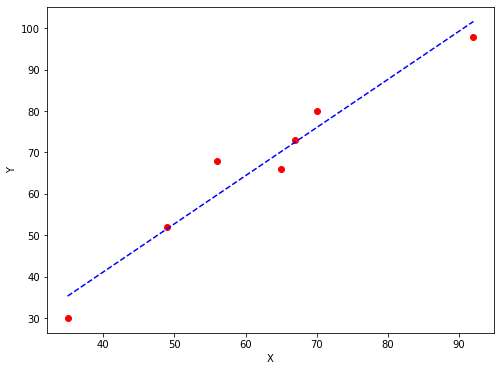

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, marker='o', color='red')
plt.plot([min(X_train['Maths ']), max(X_train['Maths '])], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',
    markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
test_predict = reg.predict(X_test)
test_predict

array([[96.98033126],
       [71.37060041],
       [87.66770186]])

In [15]:
test_actual = y_test
test_actual

,Physics
2,81
8,68
4,83


In [16]:
test_actual['Physics']

2    81
8    68
4    83
Name: Physics, dtype: int64

In [17]:
import numpy as np
test_predict = np.round(test_predict,0)
test_predict

array([[97.],
       [71.],
       [88.]])

In [20]:
print('MSE: %.2f' % mean_squared_error(test_actual['Physics'], test_predict))
print('R^2: %.2f' % r2_score(test_actual['Physics'], test_predict))

MSE: 96.67
R^2: -1.19


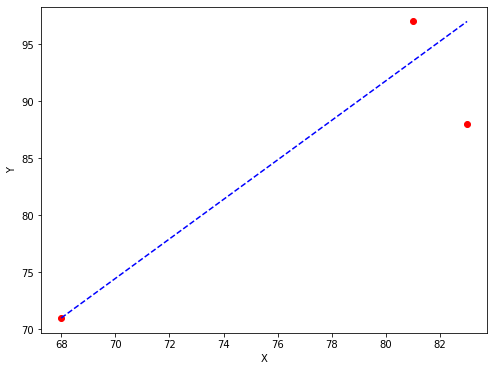

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(test_actual, test_predict, marker='o', color='red')
plt.plot([min(test_actual['Physics']), max(test_actual['Physics'])], [min(test_predict), max(test_predict)], color='blue',markerfacecolor='red',
    markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()